In [3]:
#!pip install textract
#!apt-get install -y antiword
#!pip install spacy
#!python -m spacy download en_core_web_sm
#!pip install WordCloud

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [5]:
#RESUME CSV FILE IS BEING EXTRACTED BY CONNECTING GOOGLE DRIVE TO THE COLLAB 
data = pd.read_csv("Resume.csv")
data

,Resumes,Category
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
...,...,...
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday resume
75,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday resume
76,G Himaja\n\n ...,Workday resume
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday resume


In [6]:
data.isnull().sum()

Resumes     0
Category    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


# Checking unnecessary words in the data

In [8]:
data.Resumes.str.contains('https://').value_counts() / len(data)

False    0.911392
True     0.088608
Name: Resumes, dtype: float64

In [9]:
data.Resumes.str.contains('@').value_counts() / len(data)

False    0.962025
True     0.037975
Name: Resumes, dtype: float64

# TOKENIZATION

In [10]:
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
tokens = data.Resumes.map(word_tokenize)
tokens

0     [Naveen, Sadhu, Title, :, software, developer,...
1     [Ui-Developer/, React, JS, Developer, NAME, :,...
2     [SUSOVAN, BAG, Seeking, a, challenging, positi...
3     [SHAIK, ABDUL, SHARUK, 2, years, ’, Experience...
4     [MD, KHIZARUDDIN, RAUF, EXPERIENCE, ⇨, Current...
                            ...                        
74    [[, pic, ], [, pic, ], •, 3.3, years, of, IT, ...
75    [JYOTI, VERMA, PROFESSIONAL, SUMMARY, PROFESSI...
76    [G, Himaja, Career, Objective, To, work, towar...
77    [Name, :, Naresh, Babu, Cherukuri, Objective, ...
78    [Hari, Krishna, M, Summary, :, •, A, result, o...
Name: Resumes, Length: 79, dtype: object

In [11]:
data = [Text.strip() for Text in data.Resumes] #Removes both leading and trailing white space
data = [Text for Text in data if Text] #filters out empty string

In [12]:
data

['Naveen Sadhu\n\n\n\n\n\nTitle: software developer\t\t\t\t                  \n\nLocation: Hyderabad, India\t\t\t                                \n\n\n\nProfessional Summary\n\n1 year of overall IT experience in Html, Sql, Reactjs and Nodejs.\n\nExperience in working with Application development and testing tool\n\nHard working and enthusiastic.\n\n\tExcellent communication, interpersonal, analytical skills, and strong ability to perform as part of team.\n\nExceptional ability to learn new concepts.\n\n\t\n\nEducation\n\n\tBachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management (Affiliated to JNTUH).\n\nSkills\n\nTechnology\n\nMERN stack\n\nFrameworks\n\nFramework7\n\nIDEs\n\nEclipse, Visual Studio Code\n\nDatabases\n\nSQL, Mongo Database\n\nOperating Systems\n\nWindows, Unix \n\n\n\nProfessional Experience\n\nCurrent Project \n\nClient\t\t  : Inline4, USA\n\n\n\nOrganization     : Edvenswa tech Pvt. Ltd\n\n\n\nTechnolog

In [13]:
review = ' '.join(data)
review

'Naveen Sadhu\n\n\n\n\n\nTitle: software developer\t\t\t\t                  \n\nLocation: Hyderabad, India\t\t\t                                \n\n\n\nProfessional Summary\n\n1 year of overall IT experience in Html, Sql, Reactjs and Nodejs.\n\nExperience in working with Application development and testing tool\n\nHard working and enthusiastic.\n\n\tExcellent communication, interpersonal, analytical skills, and strong ability to perform as part of team.\n\nExceptional ability to learn new concepts.\n\n\t\n\nEducation\n\n\tBachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Institute of Technology and Management (Affiliated to JNTUH).\n\nSkills\n\nTechnology\n\nMERN stack\n\nFrameworks\n\nFramework7\n\nIDEs\n\nEclipse, Visual Studio Code\n\nDatabases\n\nSQL, Mongo Database\n\nOperating Systems\n\nWindows, Unix \n\n\n\nProfessional Experience\n\nCurrent Project \n\nClient\t\t  : Inline4, USA\n\n\n\nOrganization     : Edvenswa tech Pvt. Ltd\n\n\n\nTechnology

In [14]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
review_tokens = tknzr.tokenize(review)
review_tokens[0:10]

['Naveen',
 'Sadhu',
 'Title',
 ':',
 'software',
 'developer',
 'Location',
 ':',
 'Hyderabad',
 ',']

In [15]:
review_tokens_text = ' '.join(review_tokens)
review_tokens_text[0:500]

'Naveen Sadhu Title : software developer Location : Hyderabad , India Professional Summary 1 year of overall IT experience in Html , Sql , Reactjs and Nodejs . Experience in working with Application development and testing tool Hard working and enthusiastic . Excellent communication , interpersonal , analytical skills , and strong ability to perform as part of team . Exceptional ability to learn new concepts . Education Bachelor of Technology in Computer Science and Engineering from Marri Laxman '

In [16]:
no_punc_text = review_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[0:200]

'Naveen Sadhu Title  software developer Location  Hyderabad  India Professional Summary 1 year of overall IT experience in Html  Sql  Reactjs and Nodejs  Experience in working with Application developm'

In [17]:
import re
no_url_text = re.sub(r'http\S+', '', no_punc_text) 
no_url_text[0:500]

'Naveen Sadhu Title  software developer Location  Hyderabad  India Professional Summary 1 year of overall IT experience in Html  Sql  Reactjs and Nodejs  Experience in working with Application development and testing tool Hard working and enthusiastic  Excellent communication  interpersonal  analytical skills  and strong ability to perform as part of team  Exceptional ability to learn new concepts  Education Bachelor of Technology in Computer Science and Engineering from Marri Laxman Reddy Instit'

In [18]:
text_tokens = word_tokenize(no_url_text) 
text_tokens[0:10]

['Naveen',
 'Sadhu',
 'Title',
 'software',
 'developer',
 'Location',
 'Hyderabad',
 'India',
 'Professional',
 'Summary']

# Removing stopwords

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
no_stop_tokens

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Naveen',
 'Sadhu',
 'Title',
 'software',
 'developer',
 'Location',
 'Hyderabad',
 'India',
 'Professional',
 'Summary',
 '1',
 'year',
 'overall',
 'IT',
 'experience',
 'Html',
 'Sql',
 'Reactjs',
 'Nodejs',
 'Experience',
 'working',
 'Application',
 'development',
 'testing',
 'tool',
 'Hard',
 'working',
 'enthusiastic',
 'Excellent',
 'communication',
 'interpersonal',
 'analytical',
 'skills',
 'strong',
 'ability',
 'perform',
 'part',
 'team',
 'Exceptional',
 'ability',
 'learn',
 'new',
 'concepts',
 'Education',
 'Bachelor',
 'Technology',
 'Computer',
 'Science',
 'Engineering',
 'Marri',
 'Laxman',
 'Reddy',
 'Institute',
 'Technology',
 'Management',
 'Affiliated',
 'JNTUH',
 'Skills',
 'Technology',
 'MERN',
 'stack',
 'Frameworks',
 'Framework',
 '7',
 'IDEs',
 'Eclipse',
 'Visual',
 'Studio',
 'Code',
 'Databases',
 'SQL',
 'Mongo',
 'Database',
 'Operating',
 'Systems',
 'Windows',
 'Unix',
 'Professional',
 'Experience',
 'Current',
 'Project',
 'Client',
 'Inlin

In [20]:
print(no_stop_tokens[0:100])

['Naveen', 'Sadhu', 'Title', 'software', 'developer', 'Location', 'Hyderabad', 'India', 'Professional', 'Summary', '1', 'year', 'overall', 'IT', 'experience', 'Html', 'Sql', 'Reactjs', 'Nodejs', 'Experience', 'working', 'Application', 'development', 'testing', 'tool', 'Hard', 'working', 'enthusiastic', 'Excellent', 'communication', 'interpersonal', 'analytical', 'skills', 'strong', 'ability', 'perform', 'part', 'team', 'Exceptional', 'ability', 'learn', 'new', 'concepts', 'Education', 'Bachelor', 'Technology', 'Computer', 'Science', 'Engineering', 'Marri', 'Laxman', 'Reddy', 'Institute', 'Technology', 'Management', 'Affiliated', 'JNTUH', 'Skills', 'Technology', 'MERN', 'stack', 'Frameworks', 'Framework', '7', 'IDEs', 'Eclipse', 'Visual', 'Studio', 'Code', 'Databases', 'SQL', 'Mongo', 'Database', 'Operating', 'Systems', 'Windows', 'Unix', 'Professional', 'Experience', 'Current', 'Project', 'Client', 'Inline', '4', 'USA', 'Organization', 'Edvenswa', 'tech', 'Pvt', 'Ltd', 'Technology', 'M

In [21]:
lower_words = [Text.lower() for Text in no_stop_tokens]
lower_words

['naveen',
 'sadhu',
 'title',
 'software',
 'developer',
 'location',
 'hyderabad',
 'india',
 'professional',
 'summary',
 '1',
 'year',
 'overall',
 'it',
 'experience',
 'html',
 'sql',
 'reactjs',
 'nodejs',
 'experience',
 'working',
 'application',
 'development',
 'testing',
 'tool',
 'hard',
 'working',
 'enthusiastic',
 'excellent',
 'communication',
 'interpersonal',
 'analytical',
 'skills',
 'strong',
 'ability',
 'perform',
 'part',
 'team',
 'exceptional',
 'ability',
 'learn',
 'new',
 'concepts',
 'education',
 'bachelor',
 'technology',
 'computer',
 'science',
 'engineering',
 'marri',
 'laxman',
 'reddy',
 'institute',
 'technology',
 'management',
 'affiliated',
 'jntuh',
 'skills',
 'technology',
 'mern',
 'stack',
 'frameworks',
 'framework',
 '7',
 'ides',
 'eclipse',
 'visual',
 'studio',
 'code',
 'databases',
 'sql',
 'mongo',
 'database',
 'operating',
 'systems',
 'windows',
 'unix',
 'professional',
 'experience',
 'current',
 'project',
 'client',
 'inlin

# Applying Stemming

In [22]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
stemmed_tokens

['naveen',
 'sadhu',
 'titl',
 'softwar',
 'develop',
 'locat',
 'hyderabad',
 'india',
 'profession',
 'summari',
 '1',
 'year',
 'overal',
 'it',
 'experi',
 'html',
 'sql',
 'reactj',
 'nodej',
 'experi',
 'work',
 'applic',
 'develop',
 'test',
 'tool',
 'hard',
 'work',
 'enthusiast',
 'excel',
 'commun',
 'interperson',
 'analyt',
 'skill',
 'strong',
 'abil',
 'perform',
 'part',
 'team',
 'except',
 'abil',
 'learn',
 'new',
 'concept',
 'educ',
 'bachelor',
 'technolog',
 'comput',
 'scienc',
 'engin',
 'marri',
 'laxman',
 'reddi',
 'institut',
 'technolog',
 'manag',
 'affili',
 'jntuh',
 'skill',
 'technolog',
 'mern',
 'stack',
 'framework',
 'framework',
 '7',
 'ide',
 'eclips',
 'visual',
 'studio',
 'code',
 'databas',
 'sql',
 'mongo',
 'databas',
 'oper',
 'system',
 'window',
 'unix',
 'profession',
 'experi',
 'current',
 'project',
 'client',
 'inlin',
 '4',
 'usa',
 'organ',
 'edvenswa',
 'tech',
 'pvt',
 'ltd',
 'technolog',
 'mern',
 'stack',
 'html',
 'css',
 '

In [23]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
doc

naveen sadhu title software developer location hyderabad india professional summary 1 year overall it experience html sql reactjs nodejs experience working application development testing tool hard working enthusiastic excellent communication interpersonal analytical skills strong ability perform part team exceptional ability learn new concepts education bachelor technology computer science engineering marri laxman reddy institute technology management affiliated jntuh skills technology mern stack frameworks framework 7 ides eclipse visual studio code databases sql mongo database operating systems windows unix professional experience current project client inline 4 usa organization edvenswa tech pvt ltd technology mern stack html css bootstrap description the project goal provide whenever user wants servicing bike go directly application book slot bike servicing why whenever customer problem directly book service service provider take bike servicing contribution understand implement fe

# Applying Lemmatization

In [24]:
lemmas = [token.lemma_ for token in doc]
lemmas

['naveen',
 'sadhu',
 'title',
 'software',
 'developer',
 'location',
 'hyderabad',
 'india',
 'professional',
 'summary',
 '1',
 'year',
 'overall',
 'it',
 'experience',
 'html',
 'sql',
 'reactjs',
 'nodejs',
 'experience',
 'work',
 'application',
 'development',
 'testing',
 'tool',
 'hard',
 'work',
 'enthusiastic',
 'excellent',
 'communication',
 'interpersonal',
 'analytical',
 'skill',
 'strong',
 'ability',
 'perform',
 'part',
 'team',
 'exceptional',
 'ability',
 'learn',
 'new',
 'concept',
 'education',
 'bachelor',
 'technology',
 'computer',
 'science',
 'engineering',
 'marri',
 'laxman',
 'reddy',
 'institute',
 'technology',
 'management',
 'affiliate',
 'jntuh',
 'skill',
 'technology',
 'mern',
 'stack',
 'framework',
 'framework',
 '7',
 'ide',
 'eclipse',
 'visual',
 'studio',
 'code',
 'database',
 'sql',
 'mongo',
 'database',
 'operating',
 'system',
 'window',
 'unix',
 'professional',
 'experience',
 'current',
 'project',
 'client',
 'inline',
 '4',
 'usa

In [25]:
clean_review = ' '.join(lemmas)
clean_review

'naveen sadhu title software developer location hyderabad india professional summary 1 year overall it experience html sql reactjs nodejs experience work application development testing tool hard work enthusiastic excellent communication interpersonal analytical skill strong ability perform part team exceptional ability learn new concept education bachelor technology computer science engineering marri laxman reddy institute technology management affiliate jntuh skill technology mern stack framework framework 7 ide eclipse visual studio code database sql mongo database operating system window unix professional experience current project client inline 4 usa organization edvenswa tech pvt ltd technology mern stack html css bootstrap description the project goal provide whenever user want servicing bike go directly application book slot bike servicing why whenever customer problem directly book service service provider take bike servicing contribution understand implement feature negotiate

# Applying Text Processing On Dataframe

In [26]:
data = pd.read_csv('Resume.csv')
data

,Resumes,Category
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume
...,...,...
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday resume
75,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday resume
76,G Himaja\n\n ...,Workday resume
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday resume


In [27]:
def remove_pattern(text, pattern_regex):
  r = re.findall(pattern_regex, text)
  for i in r:
    text = re.sub(i, '', text)

  return text

# **Converting into clean resumes**

In [28]:
data['Clean_Resumes'] = np.vectorize(remove_pattern)(data['Resumes'],'@[\w]*')
data.head()

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer \n\nNAME: KRI...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG \n\nSeeking a challenging po...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...


# **Removing URLs from Clean_Resumes**

In [29]:
clean_Resumes = []
for index, row in data.iterrows():
  words_without_links = [word for word in row.Clean_Resumes.split() if 'http' not in word] 
  clean_Resumes.append(' '.join(words_without_links))
data['Clean_Resumes'] = clean_Resumes
data.head()

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...


# **removing spaces**

In [30]:
data = data[data['Clean_Resumes']!='']
data.drop_duplicates(subset=['Clean_Resumes'], keep= False)
data = data.reset_index(drop=True)
data.head(10)

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,Naveen Sadhu Title: software developer Locatio...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,Ui-Developer/ React JS Developer NAME: KRISHNA...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,SUSOVAN BAG Seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,SHAIK ABDUL SHARUK 2 years’ Experience in Wipr...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,MD KHIZARUDDIN RAUF EXPERIENCE ⇨ Currently wor...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,Venkatalakshmi Pedireddy Software Developer Ex...
6,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,Maryala Vinay Reddy Professional Summary: • Ha...
7,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,Kanumuru Deepak Reddy CAREER OBJECTIVE: To sec...
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,Kotani Durga Prasad Objective: Aspirant for a ...
9,\n CURRICULUM VIT...,React JS Developer Resume,CURRICULUM VITAE |Anjani Priyadarshini |Object...


# **Making text lowercase, removing text in square brackets, links, punctuation and remove words containing numbers**

In [31]:
def clean_text(text):
  text = text.lower()
  text = re.sub('!','', text)
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('⇨', '', text)
  text = re.sub(':', '', text)
  text = re.sub('•', '', text)
  text = re.sub('https?://\S+|www.\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  return text

In [32]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: clean_text(x))
data.head()

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...


# **Removing emojis from Clean Resumes**

In [33]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [35]:
data['Clean_Resumes'] = data['Clean_Resumes'].apply(lambda x: remove_emoji(x))
data

,Resumes,Category,Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...
...,...,...,...
74,\n [pic]\n [pic]\n\n • 3.3 years of IT ex...,Workday resume,years of it experience as workday hcm tech...
75,JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...,Workday resume,jyoti verma professional summary professional ...
76,G Himaja\n\n ...,Workday resume,g himaja career objective to work towards achi...
77,\nName : Naresh Babu Cherukuri\n\n\nObjective...,Workday resume,name naresh babu cherukuri objective to take ...


# **Removing stop words from Clean_Resumes and Making it Absolute_Clean_Resumes**

In [36]:
my_stop_words = stopwords.words('english')

cleaned_resumes = []

for index, row in data.iterrows():

  words_without_stopwords = [word for word in row.Clean_Resumes.split() if word not in my_stop_words]

  cleaned_resumes.append(' '.join(words_without_stopwords))

data['Absolute_Clean_Resumes'] = cleaned_resumes
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react js developer name krishna pr...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...,shaik abdul sharuk years’ experience wipro car...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...,venkatalakshmi pedireddy software developer ex...
6,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...,maryala vinay reddy professional summary years...
7,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...
9,\n CURRICULUM VIT...,React JS Developer Resume,curriculum vitae anjani priyadarshini objectiv...,curriculum vitae anjani priyadarshini objectiv...


In [37]:
Tokenized_Resume = data['Absolute_Clean_Resumes'].apply(lambda x: x.split())
Tokenized_Resume.head(10)

0    [naveen, sadhu, title, software, developer, lo...
1    [uideveloper, react, js, developer, name, kris...
2    [susovan, bag, seeking, challenging, position,...
3    [shaik, abdul, sharuk, years’, experience, wip...
4    [md, khizaruddin, rauf, experience, currently,...
5    [venkatalakshmi, pedireddy, software, develope...
6    [maryala, vinay, reddy, professional, summary,...
7    [kanumuru, deepak, reddy, career, objective, s...
8    [kotani, durga, prasad, objective, aspirant, p...
9    [curriculum, vitae, anjani, priyadarshini, obj...
Name: Absolute_Clean_Resumes, dtype: object

# **Applying Lemmatization on Abosulte_Clean_Resumes**

In [38]:
word_lemmatizer = WordNetLemmatizer()
Tokenized_Resume = Tokenized_Resume.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
Tokenized_Resume.head(10)

0    [naveen, sadhu, title, software, developer, lo...
1    [uideveloper, react, j, developer, name, krish...
2    [susovan, bag, seeking, challenging, position,...
3    [shaik, abdul, sharuk, years’, experience, wip...
4    [md, khizaruddin, rauf, experience, currently,...
5    [venkatalakshmi, pedireddy, software, develope...
6    [maryala, vinay, reddy, professional, summary,...
7    [kanumuru, deepak, reddy, career, objective, s...
8    [kotani, durga, prasad, objective, aspirant, p...
9    [curriculum, vitae, anjani, priyadarshini, obj...
Name: Absolute_Clean_Resumes, dtype: object

In [39]:
for i, tokens in enumerate(Tokenized_Resume):
  Tokenized_Resume[i] = ' '.join(tokens)

data['Absolute_Clean_Resumes'] = Tokenized_Resume
data.head(10)

,Resumes,Category,Clean_Resumes,Absolute_Clean_Resumes
0,Naveen Sadhu\n\n\n\n\n\nTitle: software develo...,React JS Developer Resume,naveen sadhu title software developer location...,naveen sadhu title software developer location...
1,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer Resume,uideveloper react js developer name krishna pr...,uideveloper react j developer name krishna pro...
2,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer Resume,susovan bag seeking a challenging position in ...,susovan bag seeking challenging position field...
3,SHAIK ABDUL SHARUK \n\n2 years’ Experience i...,React JS Developer Resume,shaik abdul sharuk years’ experience in wipro...,shaik abdul sharuk years’ experience wipro car...
4,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer Resume,md khizaruddin rauf experience currently work...,md khizaruddin rauf experience currently worki...
5,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer Resume,venkatalakshmi pedireddy software developer ex...,venkatalakshmi pedireddy software developer ex...
6,\nMaryala Vinay Reddy\n\nProfessional Summary:...,React JS Developer Resume,maryala vinay reddy professional summary havi...,maryala vinay reddy professional summary year ...
7,Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...,React JS Developer Resume,kanumuru deepak reddy career objective to secu...,kanumuru deepak reddy career objective secure ...
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer Resume,kotani durga prasad objective aspirant for a p...,kotani durga prasad objective aspirant positio...
9,\n CURRICULUM VIT...,React JS Developer Resume,curriculum vitae anjani priyadarshini objectiv...,curriculum vitae anjani priyadarshini objectiv...


# **Applying Count Vectorizer**

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
review_cv = cv.fit_transform(lemmas)
review_cv

<45752x4344 sparse matrix of type '<class 'numpy.int64'>'
	with 42932 stored elements in Compressed Sparse Row format>

In [41]:
cv.get_feature_names()

['006',
 '01',
 '012019',
 '0144b',
 '016',
 '017',
 '022019',
 '032',
 '032012',
 '032014',
 '032018',
 '032019',
 '032020',
 '032021',
 '04',
 '0411',
 '042019',
 '042021',
 '04th',
 '05',
 '0509',
 '052015',
 '052018',
 '052021',
 '05th',
 '06',
 '062019',
 '06th',
 '07',
 '072017',
 '07th',
 '08',
 '082011',
 '082012',
 '082014',
 '082018',
 '082020',
 '09',
 '092015',
 '092020',
 '10',
 '100',
 '1011',
 '1013',
 '102',
 '103',
 '104236',
 '106',
 '109',
 '10gr2',
 '10gr3',
 '10gr3and',
 '10th',
 '11',
 '1109',
 '112',
 '112013',
 '1131',
 '11gr2',
 '11i',
 '11th',
 '12',
 '121',
 '122',
 '122020',
 '12c',
 '12cr1',
 '12cr2',
 '12th',
 '13',
 '13000',
 '14',
 '15',
 '1502',
 '1508',
 '157',
 '16',
 '16698139',
 '17',
 '1713',
 '17329',
 '18',
 '188',
 '18c',
 '19',
 '19000',
 '1904',
 '197174',
 '1982',
 '1985',
 '1987',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '20002003',
 '2001',


# **Applying Count vectorizer on NGrams**

In [42]:
cv_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=4000)
bow_matrix_ngram = cv_ngram_range.fit_transform(lemmas)

In [43]:
print(cv_ngram_range)

CountVectorizer(max_features=4000, ngram_range=(1, 3))


In [44]:
print(bow_matrix_ngram)

  (0, 2275)	1
  (1, 3057)	1
  (2, 3604)	1
  (3, 3259)	1
  (4, 1288)	1
  (5, 1992)	1
  (6, 1761)	1
  (7, 1800)	1
  (8, 2707)	1
  (9, 3433)	1
  (11, 3980)	1
  (12, 2446)	1
  (13, 1865)	1
  (14, 1536)	1
  (15, 1755)	1
  (16, 3309)	1
  (17, 2853)	1
  (18, 2319)	1
  (19, 1536)	1
  (20, 3938)	1
  (21, 517)	1
  (22, 1289)	1
  (23, 3553)	1
  (24, 3613)	1
  (25, 1703)	1
  :	:
  (45725, 521)	1
  (45726, 794)	1
  (45727, 1539)	1
  (45728, 1670)	1
  (45729, 794)	1
  (45730, 2634)	1
  (45732, 1723)	1
  (45733, 1536)	1
  (45734, 2534)	1
  (45735, 2049)	1
  (45736, 3136)	1
  (45737, 3157)	1
  (45738, 1454)	1
  (45739, 3136)	1
  (45740, 3157)	1
  (45741, 517)	1
  (45742, 1496)	1
  (45744, 1497)	1
  (45745, 1710)	1
  (45746, 305)	1
  (45747, 2531)	1
  (45748, 3613)	1
  (45749, 288)	1
  (45750, 2415)	1
  (45751, 59)	1


In [45]:
data.drop(['Resumes','Clean_Resumes'],axis=1,inplace=True) 
data

,Category,Absolute_Clean_Resumes
0,React JS Developer Resume,naveen sadhu title software developer location...
1,React JS Developer Resume,uideveloper react j developer name krishna pro...
2,React JS Developer Resume,susovan bag seeking challenging position field...
3,React JS Developer Resume,shaik abdul sharuk years’ experience wipro car...
4,React JS Developer Resume,md khizaruddin rauf experience currently worki...
...,...,...
74,Workday resume,year experience workday hcm technical consulta...
75,Workday resume,jyoti verma professional summary professional ...
76,Workday resume,g himaja career objective work towards achievi...
77,Workday resume,name naresh babu cherukuri objective take resp...


In [46]:
oneSetofStopWords = set(stopwords.words('english')+['``',"''"])
totalWords = []
Sentences = data['Absolute_Clean_Resumes'].values
cleanedSentences = ""
for records in Sentences:
  cleanedSentences += records
  required_words = nltk.word_tokenize(records)
  for word in required_words:
    if word not in oneSetofStopWords and word not in string.punctuation:
      totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)

In [47]:
wordfreqdist

FreqDist({'experience': 602, 'application': 531, 'server': 501, 'report': 472, 'peoplesoft': 443, 'workday': 427, 'using': 395, 'integration': 368, 'project': 365, 'data': 332, ...})

In [48]:
mostcommon

[('experience', 602),
 ('application', 531),
 ('server', 501),
 ('report', 472),
 ('peoplesoft', 443),
 ('workday', 427),
 ('using', 395),
 ('integration', 368),
 ('project', 365),
 ('data', 332),
 ('database', 300),
 ('process', 290),
 ('system', 280),
 ('business', 271),
 ('web', 241),
 ('tool', 239),
 ('sql', 237),
 ('client', 222),
 ('worked', 219),
 ('role', 214),
 ('knowledge', 210),
 ('service', 206),
 ('requirement', 202),
 ('environment', 201),
 ('involved', 189),
 ('team', 187),
 ('skill', 185),
 ('like', 180),
 ('support', 178),
 ('technology', 176),
 ('hcm', 173),
 ('good', 169),
 ('development', 163),
 ('creating', 163),
 ('design', 162),
 ('working', 161),
 ('people', 160),
 ('technical', 157),
 ('user', 152),
 ('developer', 150),
 ('testing', 150),
 ('various', 146),
 ('created', 146),
 ('change', 145),
 ('domain', 144),
 ('responsibility', 142),
 ('issue', 139),
 ('eib', 137),
 ('security', 134),
 ('oracle', 133),
 ('management', 132),
 ('production', 130),
 ('studio', 

# WordCLouds

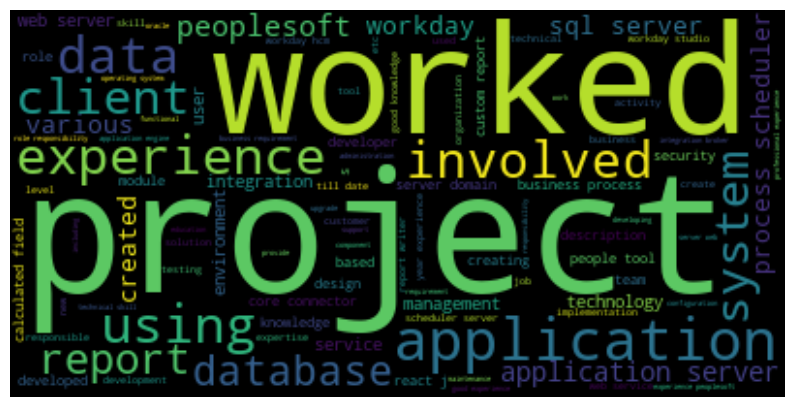

In [49]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [50]:
categories = np.sort(data['Category'].unique())
categories

array(['Peoplesoft resume', 'React JS Developer Resume',
       'SQL Developer Lighting Insight Resume', 'Workday resume'],
      dtype=object)

In [51]:
data_categories = [data[data['Category'] == category].loc[:, ['Absolute_Clean_Resumes', 'Category']] for category in categories]
data_categories

[                               Absolute_Clean_Resumes           Category
 24  murali professional summary year experience pe...  Peoplesoft resume
 25  peoplesoft admin varkala vikas career objectiv...  Peoplesoft resume
 26  peoplesoft administrator srinivask experience ...  Peoplesoft resume
 27  priyanka ramadoss mountpleasant coonoor nilgir...  Peoplesoft resume
 28  tanna sujatha objective seeking challenging ro...  Peoplesoft resume
 29  r ahmed peoplesoft technical consultant profes...  Peoplesoft resume
 30  sirazuddin bangalore india sirazuddin bangalor...  Peoplesoft resume
 31  classification internal classification interna...  Peoplesoft resume
 32  hari narayana professional summary year experi...  Peoplesoft resume
 33  c n c address manyata tech park nagavara banga...  Peoplesoft resume
 34  peoplesoft administration vivekanand sayana ca...  Peoplesoft resume
 35  peoplesoft database administrator gangareddy p...  Peoplesoft resume
 36  anubhav kumar singh core competen

In [52]:
def wordcloud(df):
  txt = ' '.join(txt for txt in data['Absolute_Clean_Resumes'])
  wordcloud = WordCloud(height=2000, width=4000, colormap=WORDCLOUD_COLOR_MAP).generate(txt)

  return wordcloud

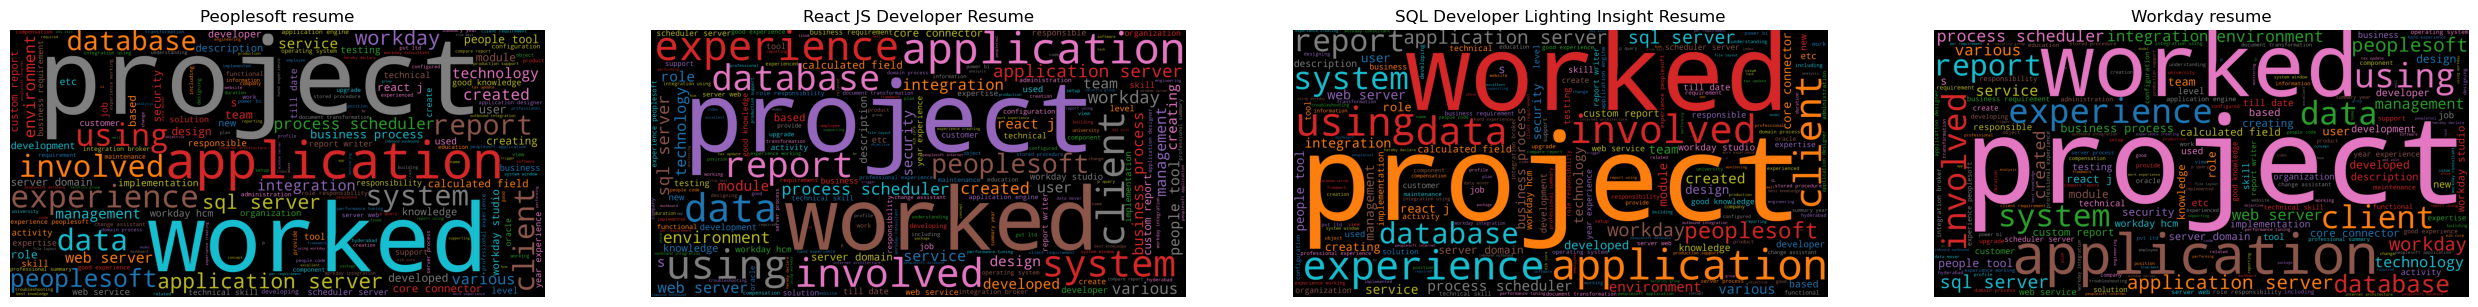

In [53]:
Plot_Palette = 'tableau-colorblind10'
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(Plot_Palette)
%matplotlib inline
plt.figure(figsize=(40, 28))
for i, category in enumerate(categories):
  wc = wordcloud(data_categories[i])
  plt.subplot(5, 5, i+1).set_title(category)
  plt.imshow(wc)
  plt.axis('off')
  plt.plot()
plt.show()
plt.close()

In [54]:
from sklearn.preprocessing import LabelEncoder

var_mod =['Category']
le = LabelEncoder()
for i in var_mod:
  data[i] = le.fit_transform(data[i])

In [55]:
data.Category.value_counts()

1    24
3    21
0    20
2    14
Name: Category, dtype: int64

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Category                79 non-null     int32 
 1   Absolute_Clean_Resumes  79 non-null     object
dtypes: int32(1), object(1)
memory usage: 1.1+ KB


In [57]:
targetCounts = data['Category'].value_counts().reset_index()['Category']
targetLabels = data['Category'].value_counts().reset_index()['index']
targetCounts
targetLabels

0    1
1    3
2    0
3    2
Name: index, dtype: int64

In [58]:
requiredText = data['Absolute_Clean_Resumes'].values
requiredTarget = data['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [59]:
requiredTarget

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [60]:
WordFeatures

<79x4266 sparse matrix of type '<class 'numpy.float64'>'
	with 18583 stored elements in Compressed Sparse Row format>

In [61]:
word_vectorizer

TfidfVectorizer(stop_words='english', sublinear_tf=True)